In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Data Analysis

### DataFrame

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data type of each column

In [3]:
df.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Check for missing values

In [4]:
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### The mode (most frequent value) of each column

In [5]:
df.mode()

,age,gender,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


### Statistical details of each of the numeric column

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Encoding

### Categorical columns

In [7]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['gender', 'smoker', 'region'], dtype='object')

## Using replace method

In [8]:
df1 = df.copy()
df1.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [9]:
for column in categorical_cols:
   unique_values = df1[column].unique()
   n = len(unique_values) #number of unique values
   replacement_values = list(range(1, n+1))
   df1[column] = df1[column].replace(unique_values, replacement_values)

# Alternative
# df1.gender = df1.gender.replace(['male', 'female'], [1, 2])
# df1.smoker = df1.smoker.replace(['yes', 'no'], [1, 2])
# df1.region = df1.region.replace(['southwest', 'southeast', 'northwest', 'northeast'], [1, 2, 3, 4])

In [10]:
df1.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,1,16884.9240
1,18,2,33.77,1,2,2,1725.5523
2,28,2,33.00,3,2,2,4449.4620


## Using Label Encoder

In [11]:
dfle = df.copy()
dfle.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [12]:
le = LabelEncoder()

for column in categorical_cols:
   dfle[column] = le.fit_transform(dfle[column])

In [13]:
dfle.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


## Using Ordinal Encoder

In [14]:
dfoe = df.copy()
dfoe.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [15]:
for column in categorical_cols:
   ode = OrdinalEncoder(categories=[dfoe[column].unique()])
   dfoe[column] = ode.fit_transform(dfoe[[column]])

In [16]:
dfoe.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,0.0,27.90,0,0.0,0.0,16884.9240
1,18,1.0,33.77,1,1.0,1.0,1725.5523
2,28,1.0,33.00,3,1.0,1.0,4449.4620


## Using One Hot/Dummy Encoder

In [17]:
dfoh = df.copy()
dfoh.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [18]:
for column in categorical_cols:
   dummy = pd.get_dummies(dfoh[[column]], drop_first=True, dtype=int, prefix=column)
   dfoh = pd.concat([dfoh,dummy],axis=1).drop(column,axis=1)

In [19]:
dfoh.head(3)

,age,bmi,children,charges,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0
2,28,33.00,3,4449.4620,1,0,0,1,0


## Correlation

In [20]:
dfle.corr()

,age,gender,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
gender,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<Axes: >

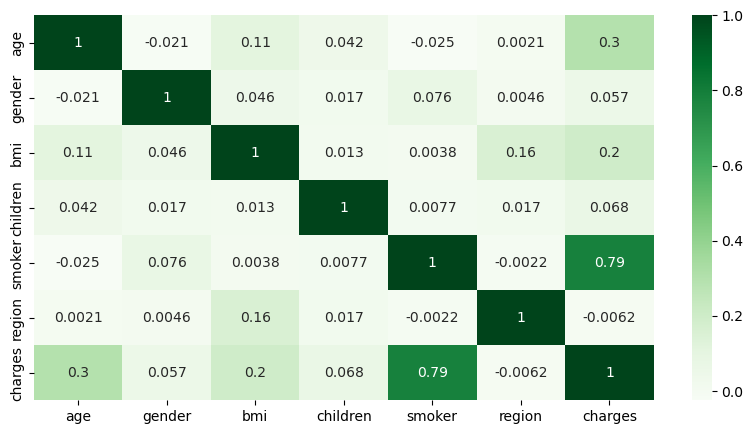

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(dfle.corr(), annot=True, cmap="Greens")